In [905]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [906]:
x = np.linspace(-10,10,101)
print(x)

[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]


In [907]:
def g(x):
    return 1/(1+np.exp(-x))

In [908]:
y = g(x)
print(y)


[4.53978687e-05 5.54485247e-05 6.77241496e-05 8.27172229e-05
 1.01029194e-04 1.23394576e-04 1.50710358e-04 1.84071905e-04
 2.24816770e-04 2.74578156e-04 3.35350130e-04 4.09567165e-04
 5.00201107e-04 6.10879359e-04 7.46028834e-04 9.11051194e-04
 1.11253603e-03 1.35851995e-03 1.65880108e-03 2.02532039e-03
 2.47262316e-03 3.01841632e-03 3.68423990e-03 4.49627316e-03
 5.48629890e-03 6.69285092e-03 8.16257115e-03 9.95180187e-03
 1.21284350e-02 1.47740317e-02 1.79862100e-02 2.18812709e-02
 2.65969936e-02 3.22954647e-02 3.91657228e-02 4.74258732e-02
 5.73241759e-02 6.91384203e-02 8.31726965e-02 9.97504891e-02
 1.19202922e-01 1.41851065e-01 1.67981615e-01 1.97816111e-01
 2.31475217e-01 2.68941421e-01 3.10025519e-01 3.54343694e-01
 4.01312340e-01 4.50166003e-01 5.00000000e-01 5.49833997e-01
 5.98687660e-01 6.45656306e-01 6.89974481e-01 7.31058579e-01
 7.68524783e-01 8.02183889e-01 8.32018385e-01 8.58148935e-01
 8.80797078e-01 9.00249511e-01 9.16827304e-01 9.30861580e-01
 9.42675824e-01 9.525741

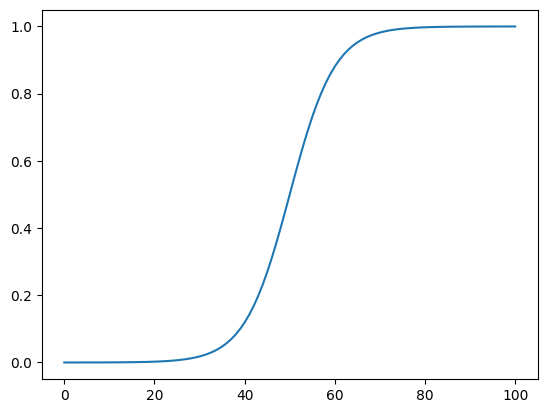

In [909]:
plt.plot(y)

In [910]:
data = pd.read_csv('E:/Python/Social_Network_Ads.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [911]:
purchased_0 = data.loc[data['Purchased']==0,:]
purchased_1 = data.loc[data['Purchased']==1,:]
age_0 = purchased_0['Age'].mean()
age_1 = purchased_1['Age'].mean()
salary_0 = purchased_0['EstimatedSalary'].mean()
salary_1 = purchased_1['EstimatedSalary'].mean()
print(age_0, age_1,salary_0, salary_1 )

32.793774319066145 46.39160839160839 60544.74708171206 86272.72727272728


In [912]:
x = data.iloc[:,[2,3]].values
y = data.iloc[:,-1:].values

In [913]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=
42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(320, 2) (80, 2)
(320, 1) (80, 1)


In [914]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std=X_train.std(axis=0,keepdims=True)
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std
print(X_train_scaled.max(), X_train_scaled.min())
print(X_test_scaled.max(), X_test_scaled.min())

2.3189753465047365 -1.949835834910827
2.1712199319080927 -1.949835834910827


In [916]:
def predict_prob(X,w):
    z = np.dot(X,w.T)
    return g(z)
def predict(X,w):
    y_hat = predict_prob(X,w)
    y_hat[y_hat >=0.5] =1
    y_hat[y_hat <0.5] =0
    return y_hat

In [917]:
def loss(X, y, w):
    y_hat = predict_prob(X, w)
    theta = 1e-4
    l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
    return -np.mean(l)

In [918]:
def grad(X, y, w):
    y_hat = predict_prob(X, w)
    delta = y_hat - y
    dw = np.dot(X.T, delta)
    return dw.T

In [919]:
def batch_generator(X, y, batch_size):
    # Chia nhiều batches để huấn luyện
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    n_batch = len(idx) // batch_size
    for i in range(n_batch):
        i_start = i * batch_size
        i_stop = min((i + 1) * batch_size, len(idx))
        yield X[idx[i_start:i_stop], :], y[idx[i_start:i_stop],:]

In [920]:
def gradient_descent(X, y, lr=0.005, epochs=100, batch_size = 32):
    w = np.zeros((1,X.shape[1]))
    losses = []
    for i in range(epochs):
        for X_batch, y_batch in batch_generator(X, y, batch_size):
            dw = grad(X_batch, y_batch, w)
            w -= lr * dw
            a = loss(X, y, w)
            losses.append(a)
    return losses, w

In [921]:
loss,w = gradient_descent(X_train_scaled,y_train)

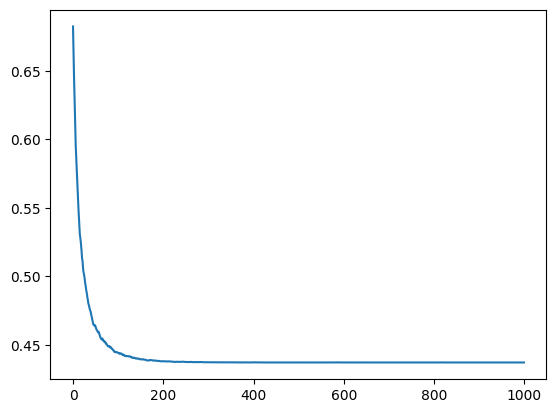

In [922]:
plt.plot(loss)

In [923]:
y_hat = predict(X_test_scaled,w)

In [924]:
def accuracy(y_true, y_pred):
# y_true và y_pred là hai danh sách chứa nhãn thực tế và nhãn dự đoán của các mẫu
# Giả sử nhãn Positive là 1 và nhãn Negative là 0
    tp = tn = fp = fn = 0 # Khởi tạo các biến đếm
    for i in range(len(y_true)): # Duyệt qua từng cặp nhãn
        if y_true[i] == 1 and y_pred[i] == 1: # Nếu cả hai nhãn đều là Positive
            tp += 1 # Tăng biến tp lên 1
        elif y_true[i] == 0 and y_pred[i] == 0: # Nếu cả hai nhãn đều là Negative
            tn += 1 # Tăng biến tn lên 1
        elif y_true[i] == 0 and y_pred[i] == 1: # Nếu nhãn thực tế là Negative nhưng nhãn dự đoán lại là Positive

            fp += 1 # Tăng biến fp lên 1
        elif y_true[i] == 1 and y_pred[i] == 0: # Trường hợp còn lại, tức là nhãn thực tế là Positive nhưng nhãn dự đoán lại là Negative
            fn += 1 # Tăng biến fn lên 1
    print(f"Accuracy = {(tp+tn)/(tp+tn+fp+fn)}")
    print(f"Precision = {(tp)/(tp+fp)}")
    print(f"Recall = {(tp)/(tp+fn)}")

In [925]:
accuracy(y_test, y_hat)

Accuracy = 0.9125
Precision = 0.8
Recall = 1.0


In [926]:
def addBias(X):
    bias = np.ones((X.shape[0],1))
    X = np.hstack((bias,X))
    return X

In [927]:
X_train_scaled_bias = addBias(X_train_scaled)
X_test_scaled_bias = addBias(X_test_scaled)

In [928]:
def loss_l2(X, y, w, alpha):
    y_hat = predict_prob(X, w)
    theta = 1e-4
    l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
    l2 = alpha * np.sum(w**2)
    return -np.mean(l) + l2/(2*X.shape[0])

In [929]:
def gradient_descent_l2(X, y, lr=0.005, epochs=100, alpha=1e-2, batch_size = 32):
    w = np.zeros((1,X.shape[1]))
    losses = []
    for i in range(epochs):
        for X_batch, y_batch in batch_generator(X, y, batch_size):
            dw = grad(X_batch, y_batch, w)
            w -= lr * dw
            a = loss_l2(X, y, w, alpha)
            losses.append(a)
    return losses, w

In [930]:
loss, w2 = gradient_descent_l2(X_train_scaled_bias, y_train)

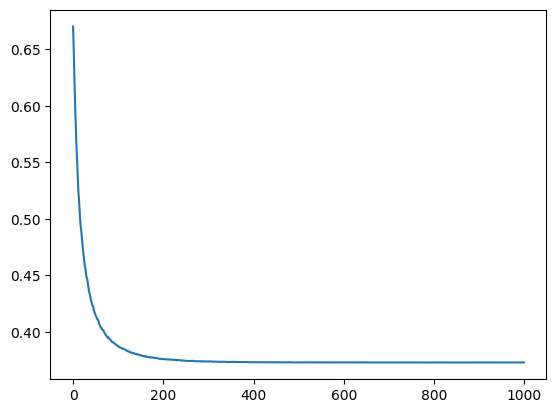

In [931]:
plt.plot(loss)

In [932]:
y_pred2 = predict(X_test_scaled_bias, w2)

In [933]:
accuracy(y_test, y_pred2)

Accuracy = 0.8875
Precision = 0.9130434782608695
Recall = 0.75


In [934]:
confusion_matrix = [[0, 0], [0, 0]]
for i in range(len(y_test)):
    if y_test[i] == 0 and y_hat[i] == 0:
        confusion_matrix[0][0] += 1
    elif y_test[i] == 0 and y_hat[i] == 1:
        confusion_matrix[0][1] += 1
    elif y_test[i] == 1 and y_hat[i] == 0:
        confusion_matrix[1][0] += 1
    elif y_test[i] == 1 and y_hat[i] == 1:
        confusion_matrix[1][1] += 1

print(confusion_matrix)

[[45, 7], [0, 28]]


In [935]:
confusion_matrix = [[0, 0], [0, 0]]
for i in range(len(y_test)):
    if y_test[i] == 0 and y_pred2[i] == 0:
        confusion_matrix[0][0] += 1
    elif y_test[i] == 0 and y_pred2[i] == 1:
        confusion_matrix[0][1] += 1
    elif y_test[i] == 1 and y_pred2[i] == 0:
        confusion_matrix[1][0] += 1
    elif y_test[i] == 1 and y_pred2[i] == 1:
        confusion_matrix[1][1] += 1

print(confusion_matrix)

[[50, 2], [7, 21]]
